In [ ]:
!pip install -U ultralytics

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 41.2/235.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Xf5VOkQi3NhfkldUYYHG")
project = rf.workspace("pallets-yfojl").project("adod-jjxps")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ADOD-1 in yolov8:: 100%|██████████| 17202/17202 [00:02<00:00, 7608.73it/s] 


In [ ]:
%cat {dataset.location}/data.yaml

names:
- Person
- Sign Board
- Traffic Light
- Vehicle
nc: 4
roboflow:
  license: CC BY 4.0
  project: adod-jjxps
  url: https://universe.roboflow.com/pallets-yfojl/adod-jjxps/dataset/1
  version: 1
  workspace: pallets-yfojl
test: /content/ADOD-1/test/images
train: /content/ADOD-1/train/images
val: /content/ADOD-1/valid/images


In [ ]:
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=80 imgsz=640 plots=True patience=5 save=True


100% 21.5M/21.5M [00:00<00:00, 400MB/s]
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/ADOD-1/data.yaml, epochs=80, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

In [ ]:
!ls runs/detect/train/

args.yaml					     PR_curve.png	    val_batch0_pred.jpg
confusion_matrix_normalized.png			     R_curve.png	    val_batch1_labels.jpg
confusion_matrix.png				     results.csv	    val_batch1_pred.jpg
events.out.tfevents.1744171195.0951f9444995.76520.0  results.png	    val_batch2_labels.jpg
F1_curve.png					     train_batch0.jpg	    val_batch2_pred.jpg
labels_correlogram.jpg				     train_batch1.jpg	    weights
labels.jpg					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg


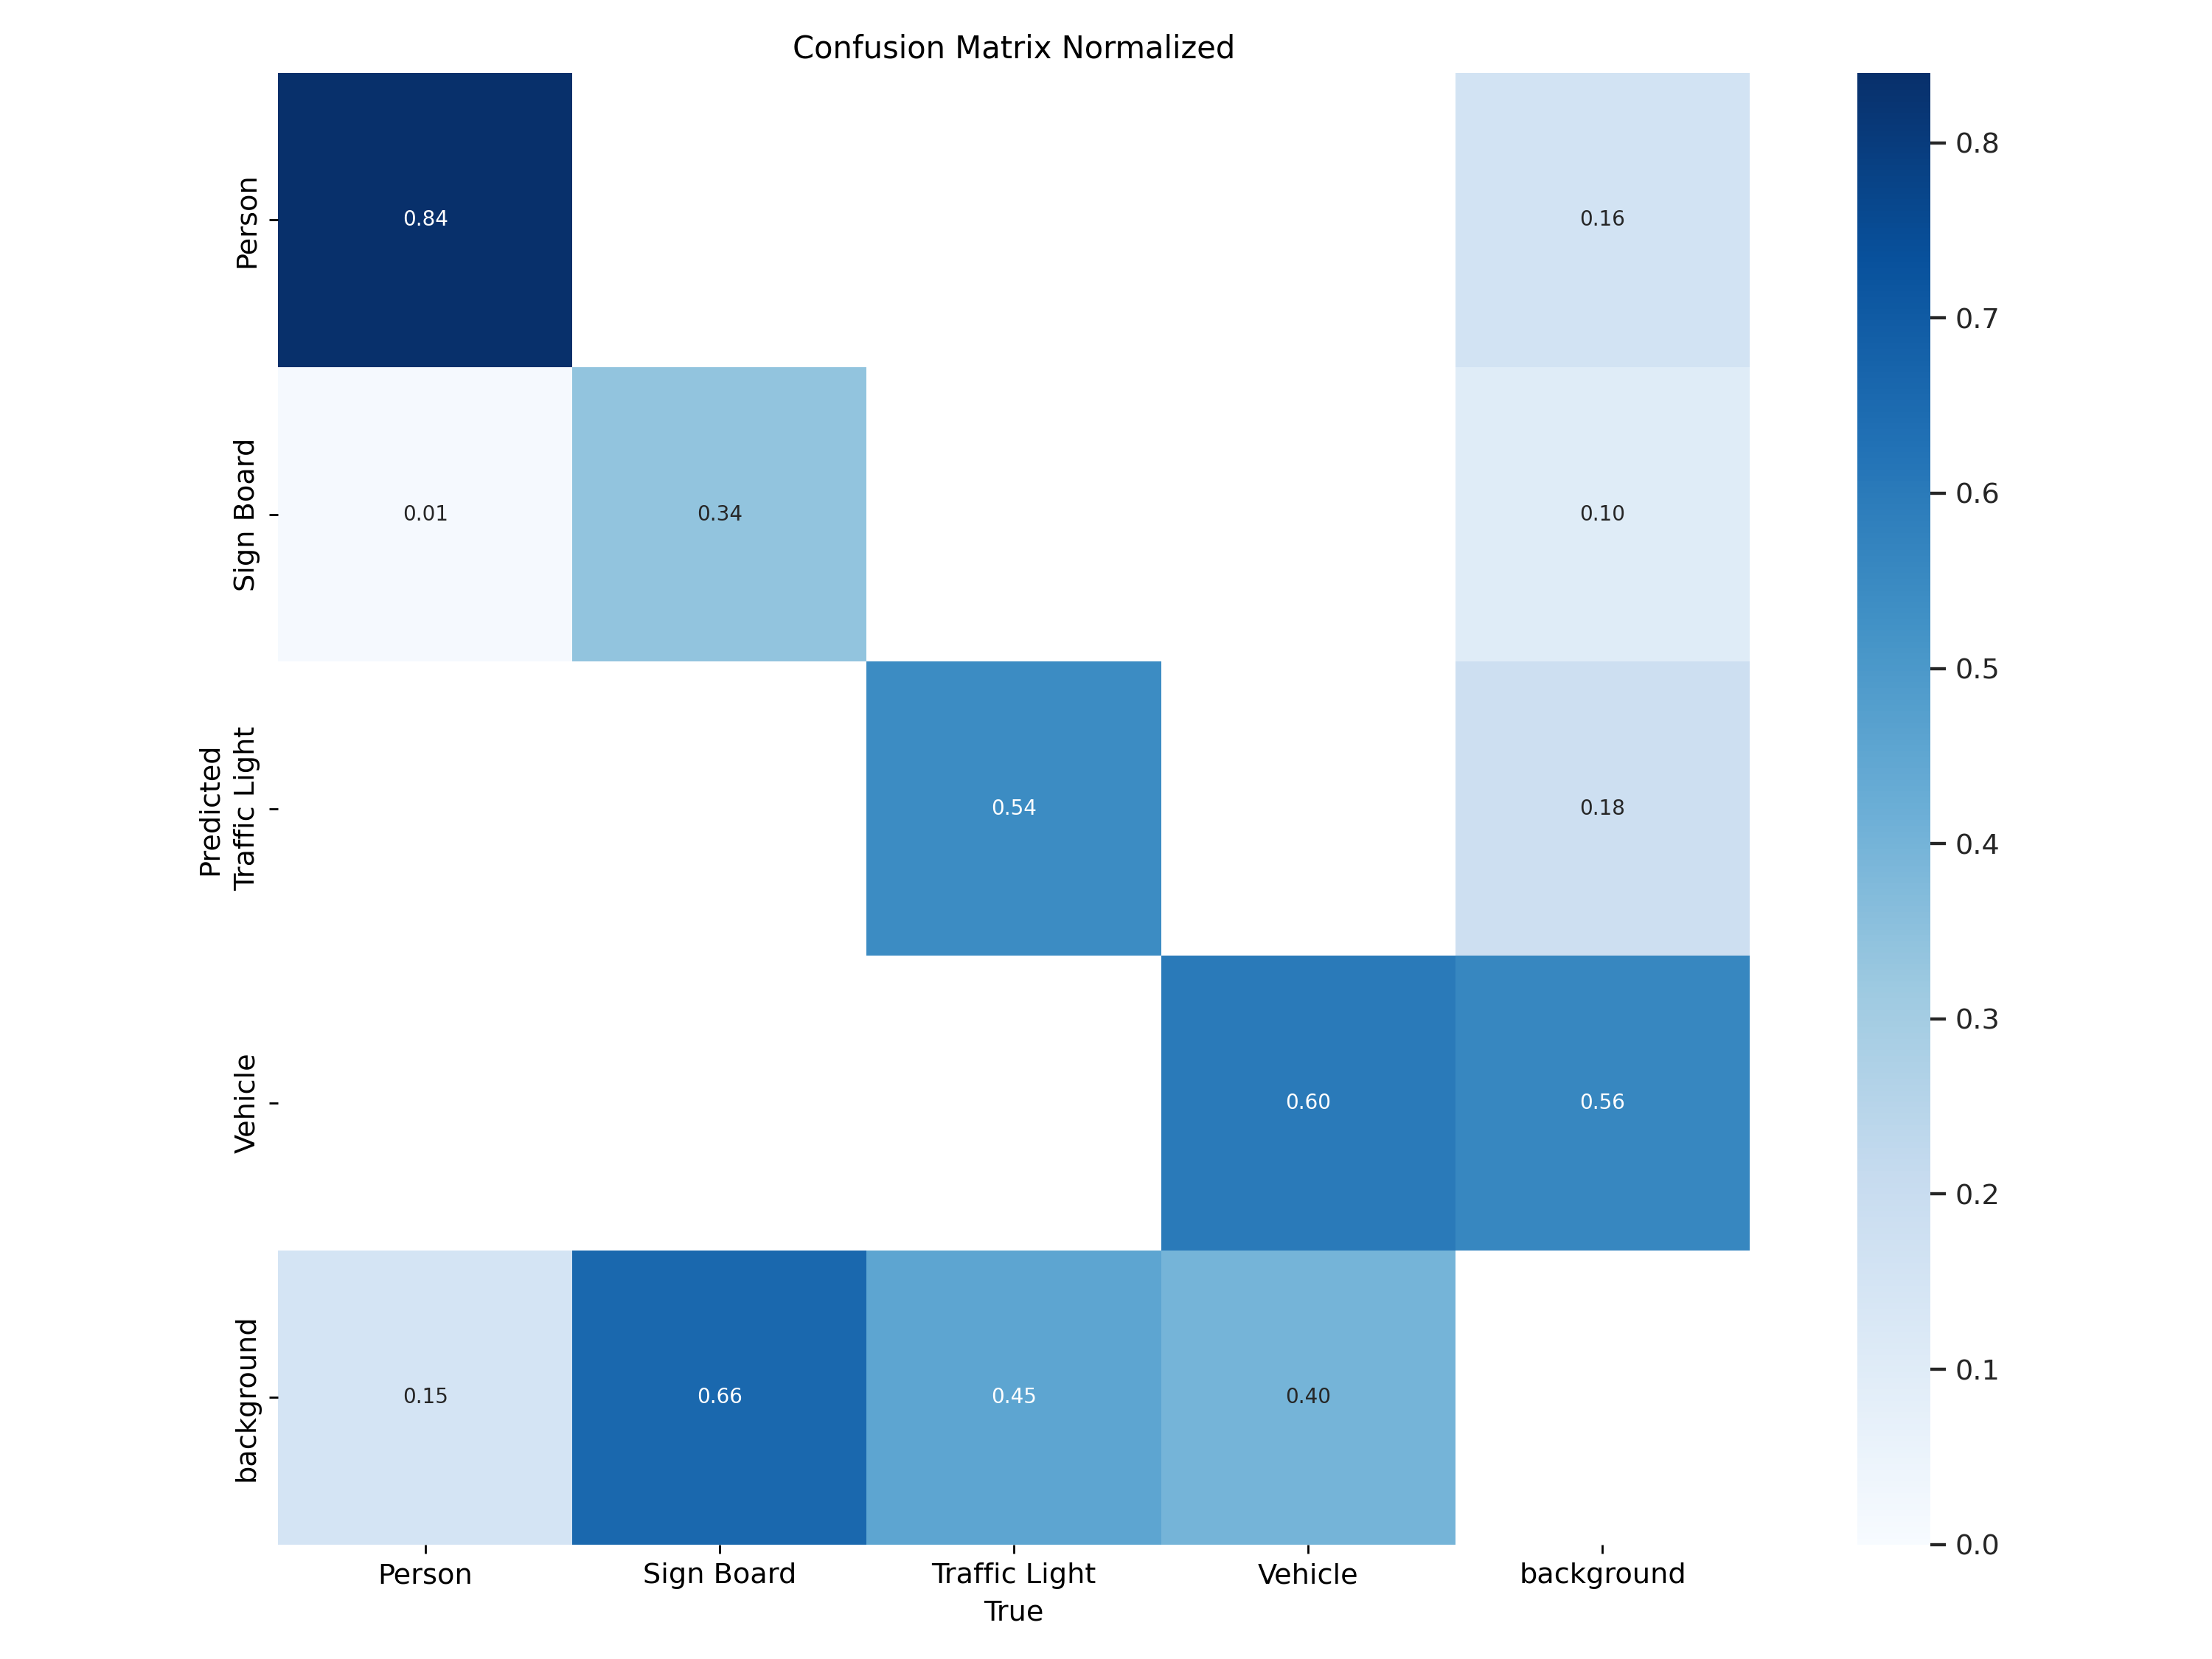

In [ ]:
Image(filename='runs/detect/train/confusion_matrix_normalized.png', width=600)

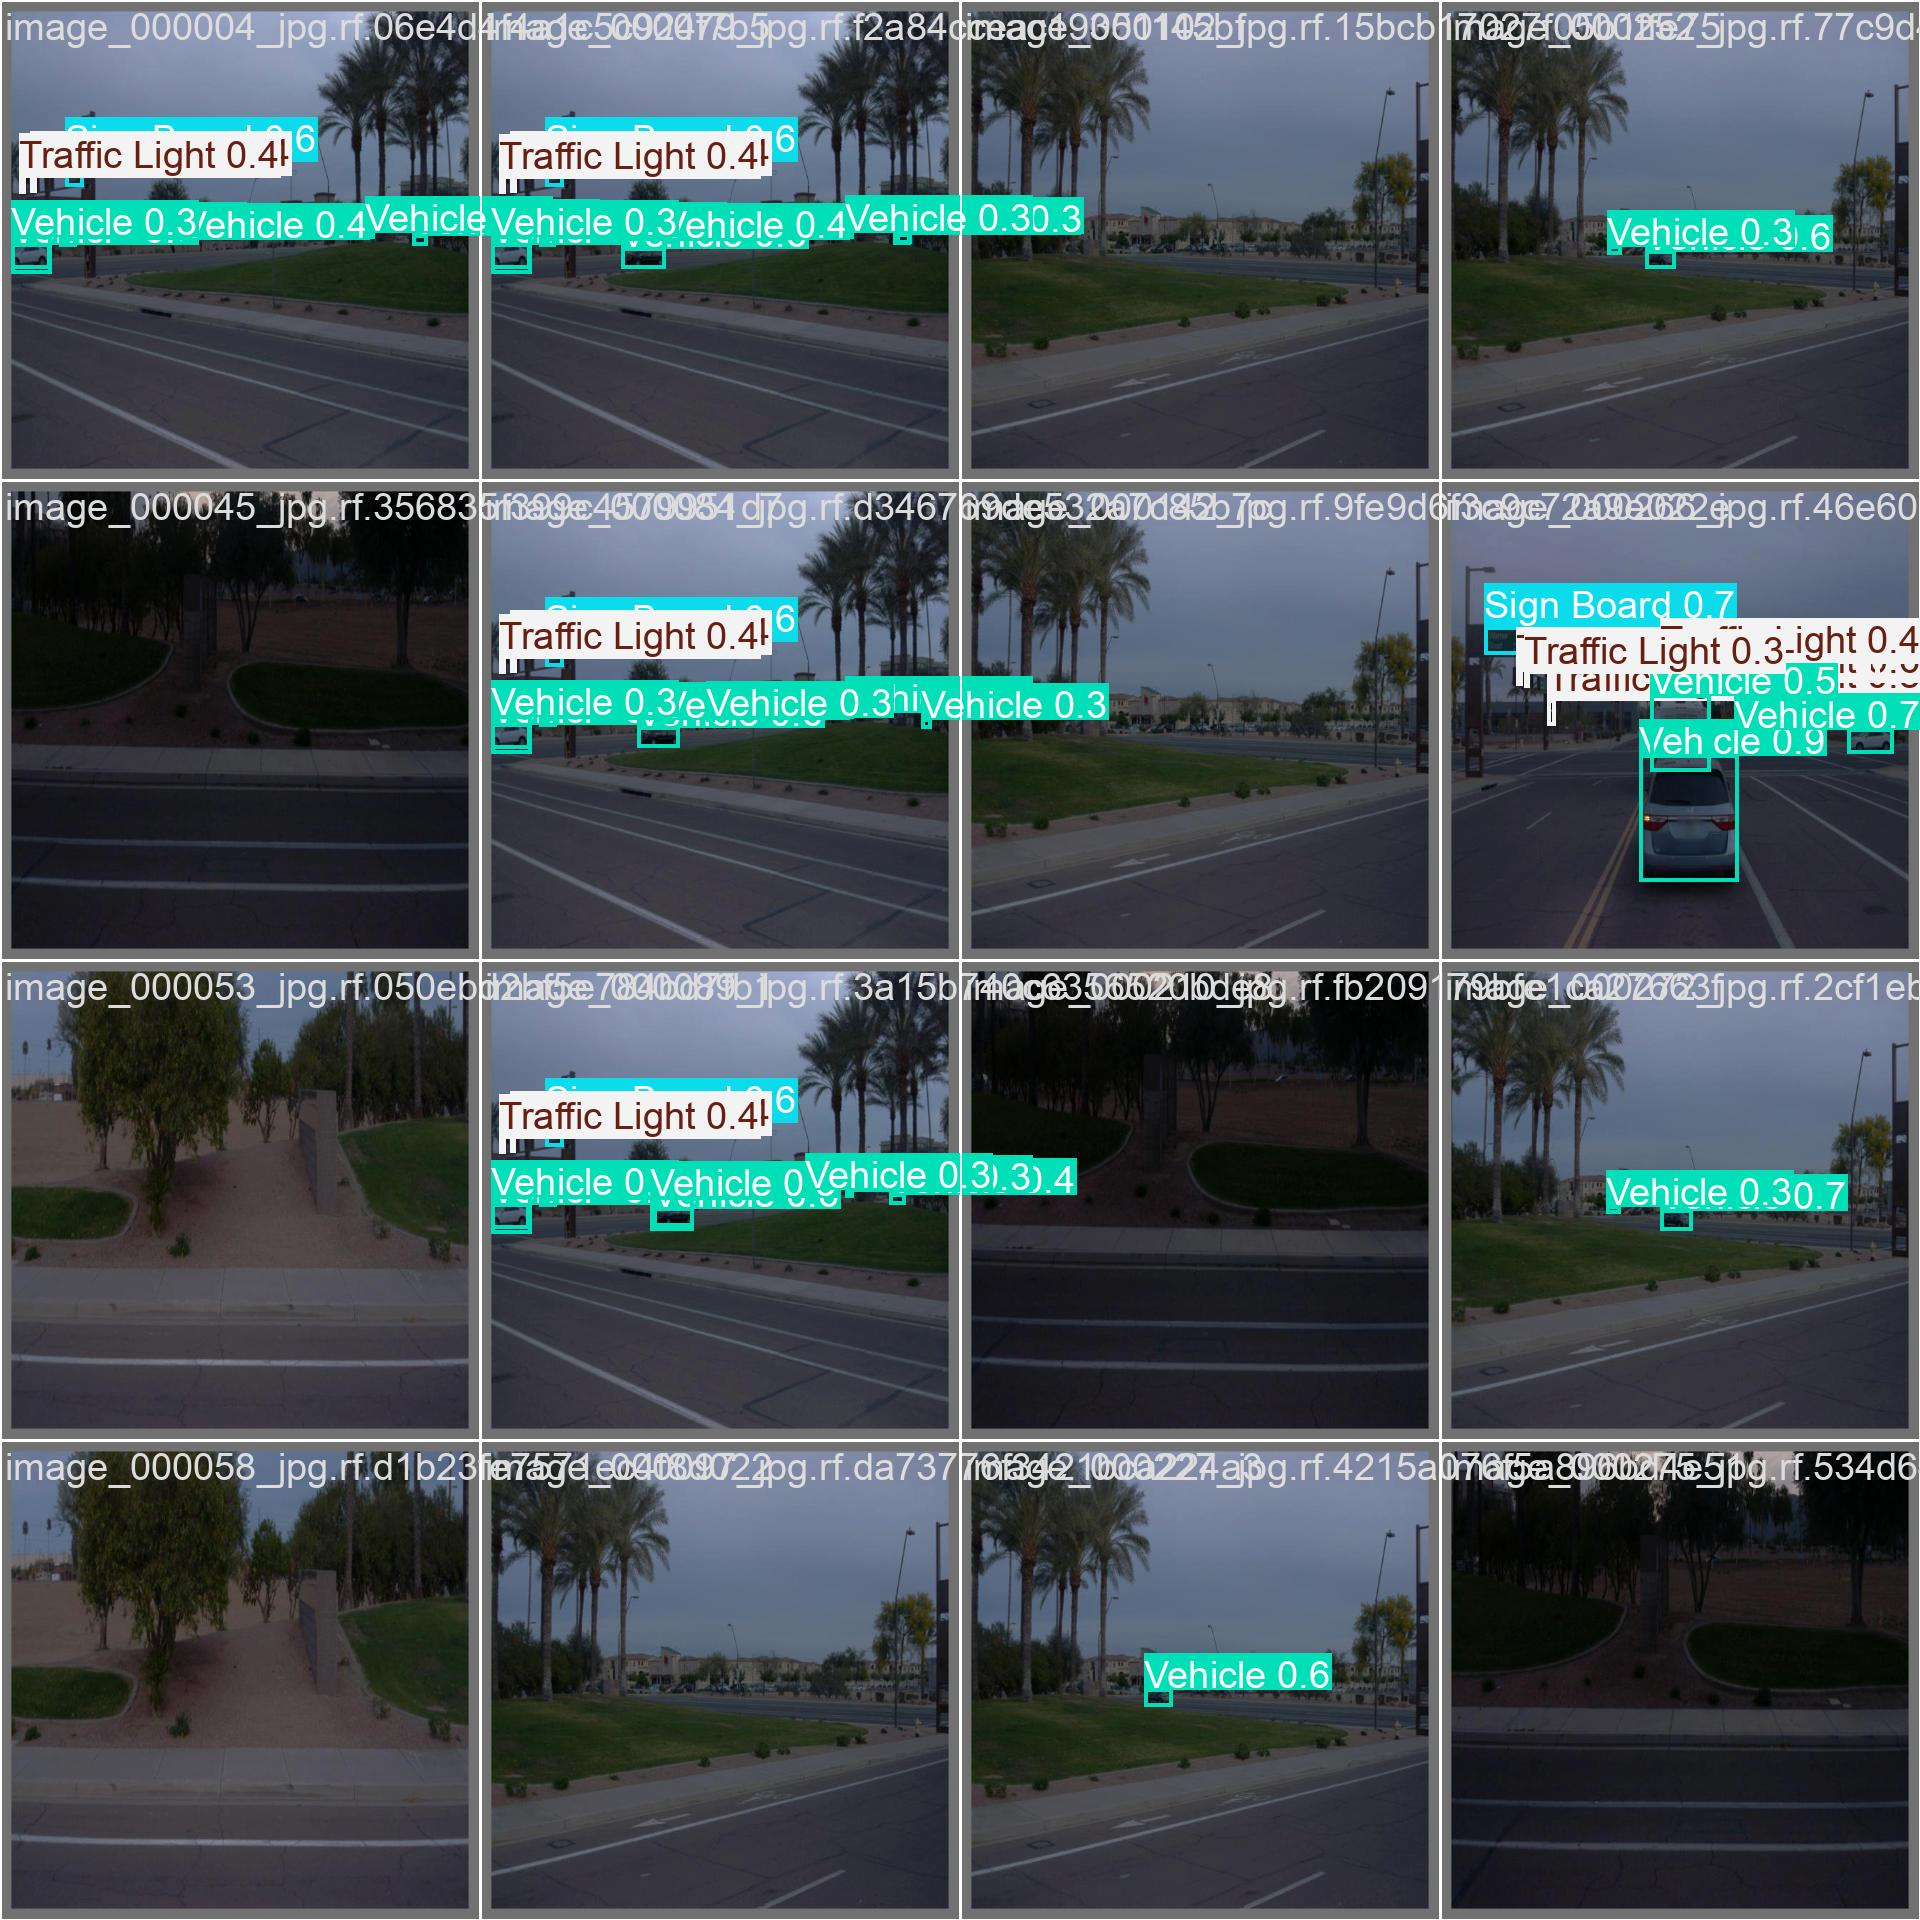

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data= {dataset.location}/data.yaml

Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/ADOD-1/valid/labels.cache... 251 images, 45 backgrounds, 0 corrupt: 100% 251/251 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:02<00:00,  5.49it/s]
                   all        251       1913      0.607      0.646      0.653      0.449
                Person         74        281      0.679      0.868      0.852      0.589
            Sign Board         93        273      0.495      0.484      0.527      0.341
         Traffic Light         91        395      0.664      0.575      0.578      0.394
               Vehicle        202        964      0.589      0.656      0.655      0.471
Speed: 0.9ms preprocess, 1.7ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/ADOD-1/test/images

Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/13 /content/ADOD-1/test/images/image_000557_jpg.rf.a7ce75be0a9d915cf87f1b27c30e9c77.jpg: 640x640 3 Sign Boards, 2 Traffic Lights, 2 Vehicles, 9.2ms
image 2/13 /content/ADOD-1/test/images/image_000593_jpg.rf.e02581784352d37a1612f4d8853dcb85.jpg: 640x640 (no detections), 7.7ms
image 3/13 /content/ADOD-1/test/images/image_000846_jpg.rf.93d3de98eb8b476ec55b18ad2feab2a8.jpg: 640x640 1 Sign Board, 8 Vehicles, 7.2ms
image 4/13 /content/ADOD-1/test/images/image_001068_jpg.rf.c87dba03ad7b278026be68cb5e25e5dd.jpg: 640x640 1 Person, 1 Vehicle, 7.0ms
image 5/13 /content/ADOD-1/test/images/image_001157_jpg.rf.289fd4cbeeb12eb659515078163ca574.jpg: 640x640 3 Persons, 2 Sign Boards, 1 Traffic Light, 3 Vehicles, 6.9ms
image 6/13 /content/ADOD-1/test/images/image_001171_jpg.rf.96113b2d05d585491ccf30eba1c2cebd.jpg: 640x6

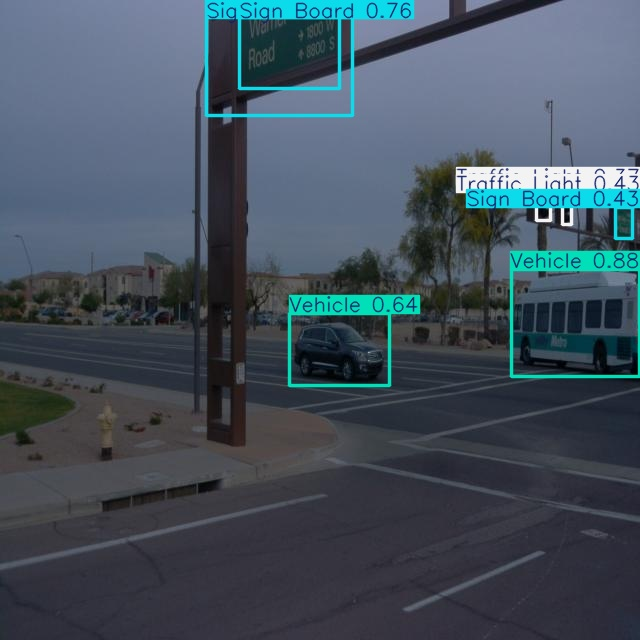

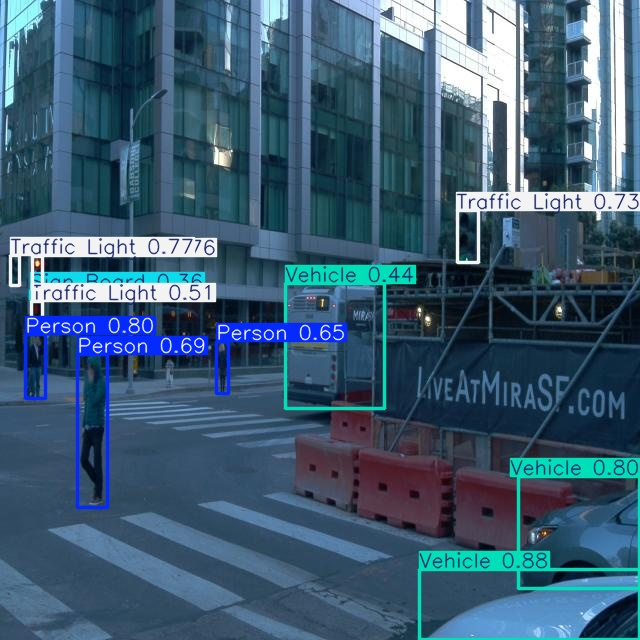

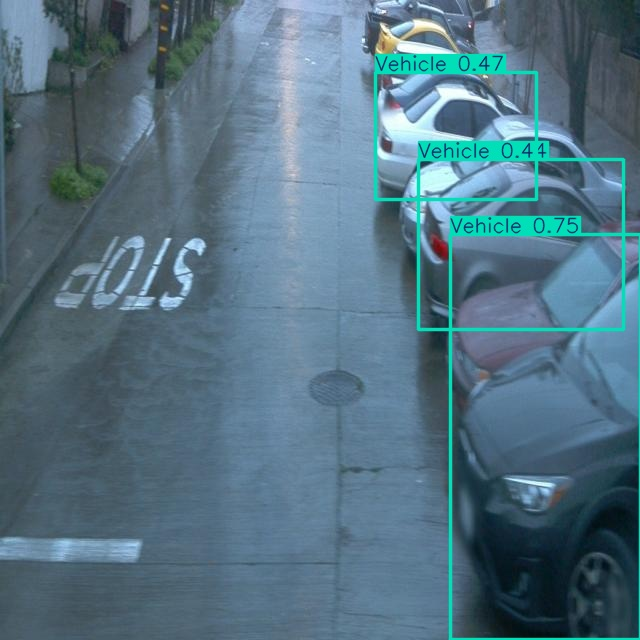

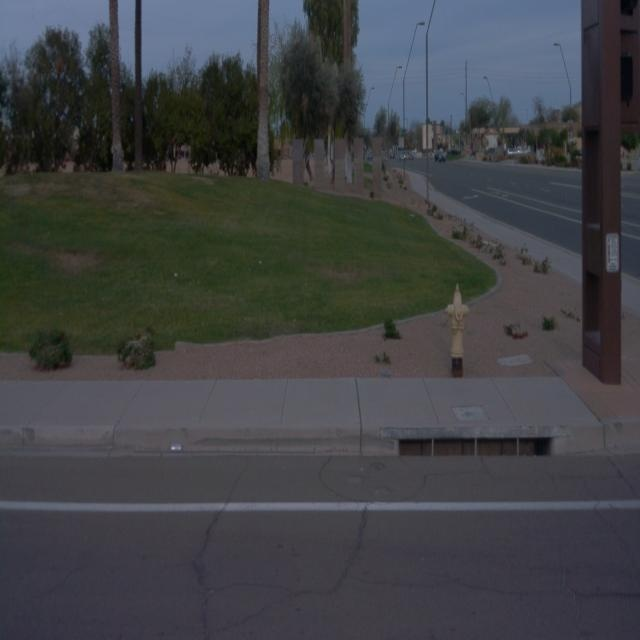

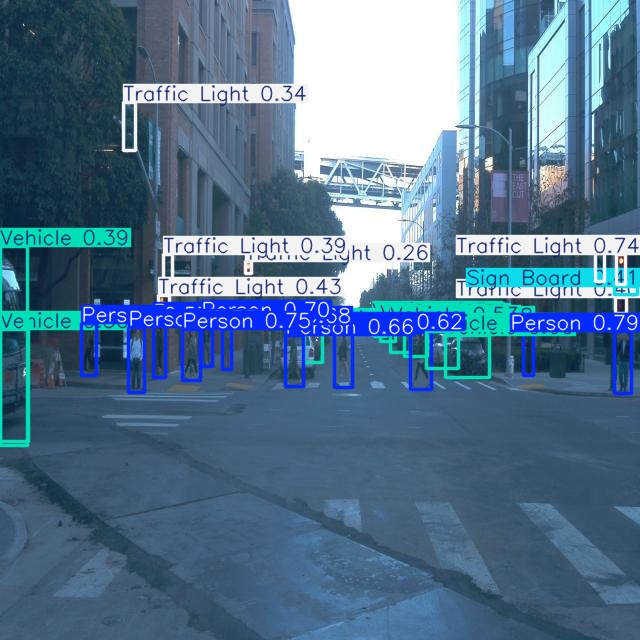

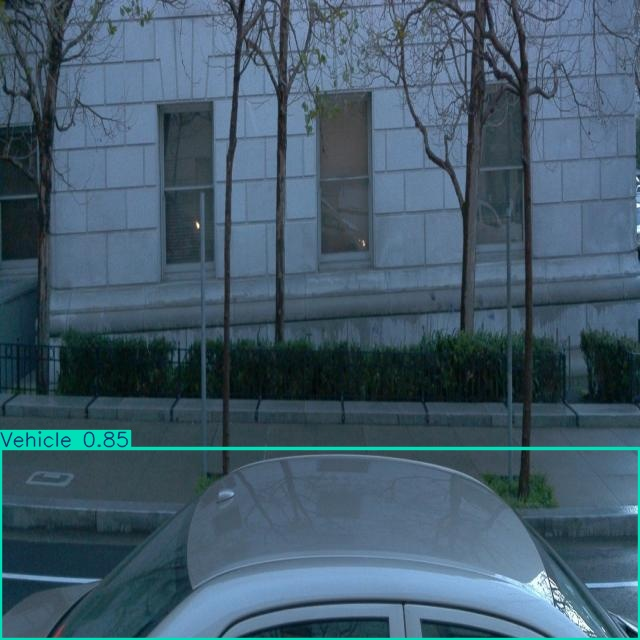

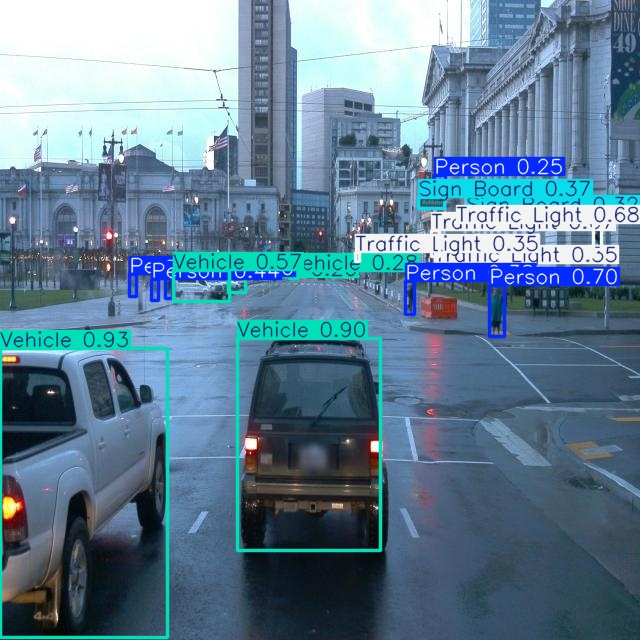

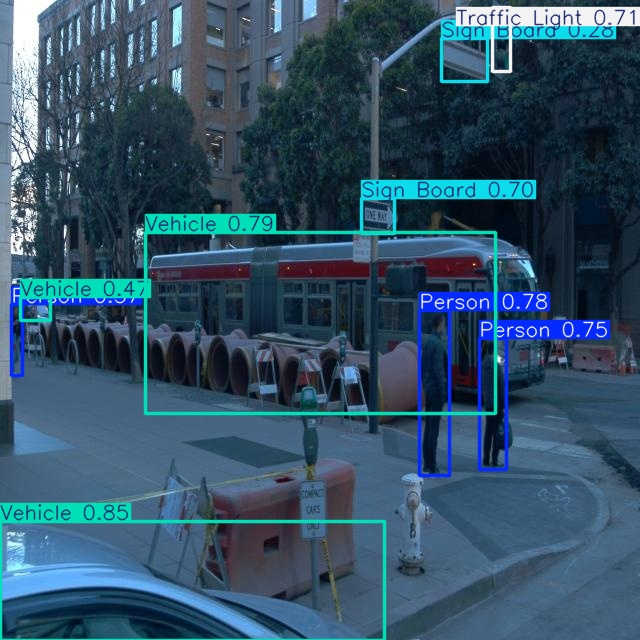

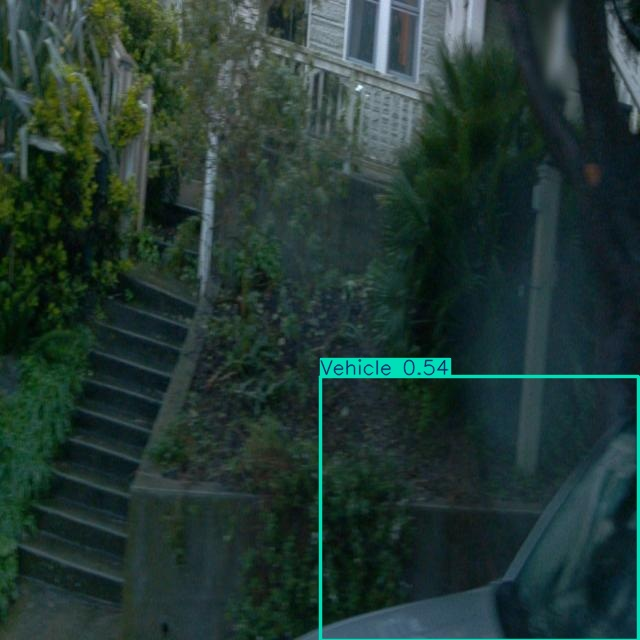

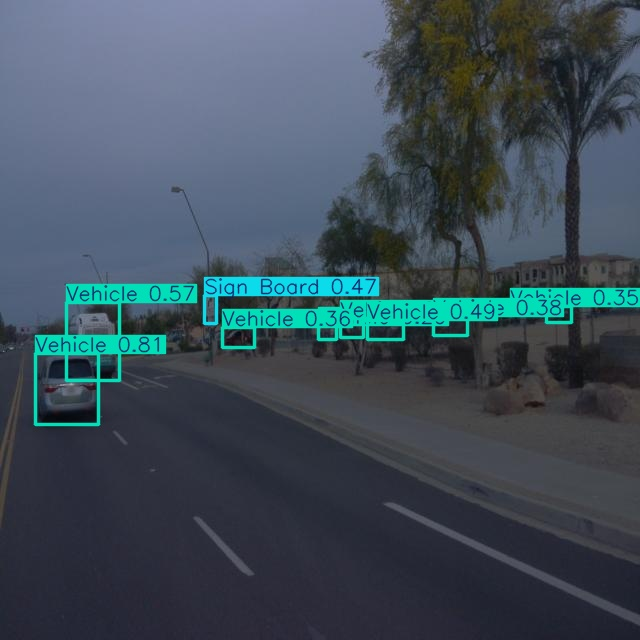

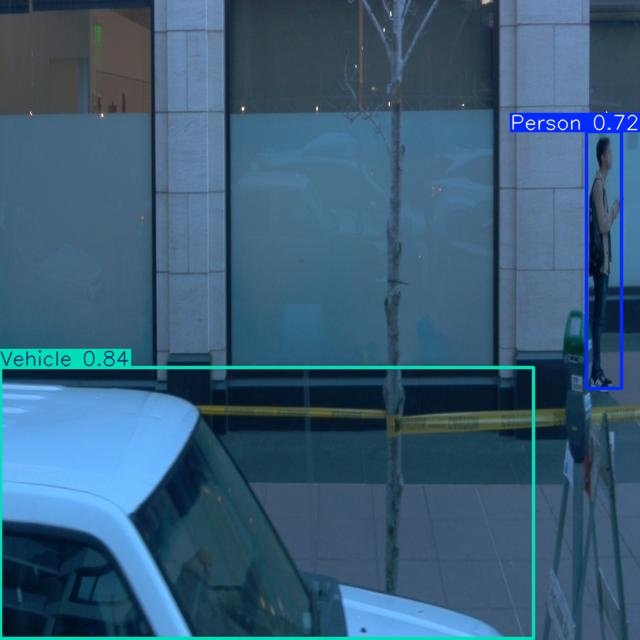

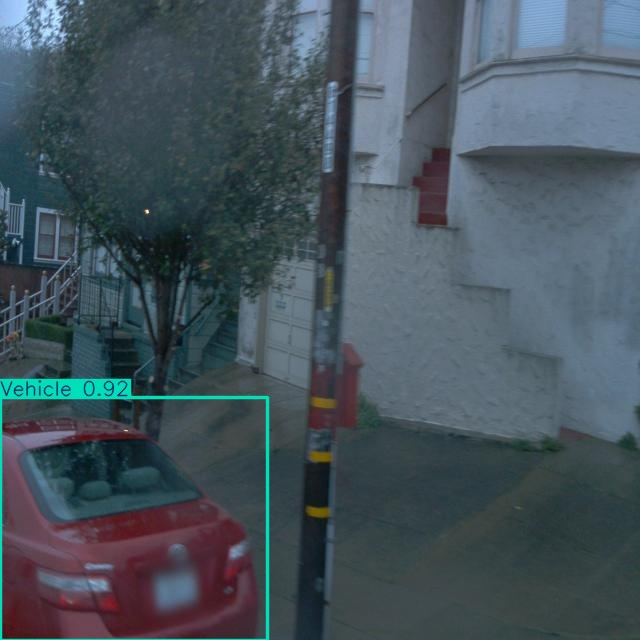

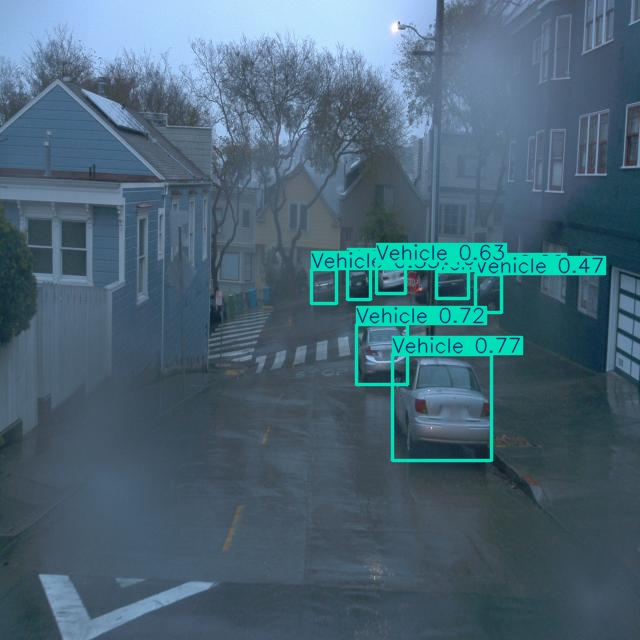

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:23]:
      display(Image(filename=image_path, width=600))
      print("\n")